# Beispiel Auswertung
### Daten: Gruppe von Erik, Fung, Isa

### Seminar 

In [122]:
import pandas as pd    # module to work with data in DataFrames.
import seaborn as sns  # module to plot DataFrames in an easy way
import matplotlib.pyplot as plt
from os import walk

In [123]:
# seaborn comes with default presets (called 'contents') for figure's aesthetics, 
# such as the font size, figure size etc. 
sns.set_context('talk') # try: 'talk', 'poster', 'notebook'

In [125]:
# we read the data
#df = pd.read_csv('results/experiment_1_phase_1.csv')
paths = ['results/', 'results/erik/', 'results/fung/']
df = None
df2 = None
count = 1
count2 = 1
for path in paths:
    
    _, _, filenames = next(walk(path), (None, None, []))

    #filenames = [ a for a in filenames if 'phase_1' in a]
    #filenames2 = [ a for a in filenames if 'phase_2' in a]

    for f in filenames:
        
        dft = None
        countt = 1
        if 'phase_1' in f:
            dft = pd.read_csv(path+f)
            dft['observer'] = 'Person '+str(count)
            count += 1
            if dft is None:
                df = dft
            else:
                df = pd.concat((df, dft)) 
        elif 'phase_2' in f:
            dft = pd.read_csv(path+f)
            dft['observer'] = 'Person '+str(count2)
            count2 += 1
            if dft is None:
                df2 = dft
            else:
                df2 = pd.concat((df2, dft)) 
        else:
            continue
        
    
dfo = df.copy()
df['img_type'] = df['img_type'].replace(0, 'abstoßend')
df['img_type'] = df['img_type'].replace(1, 'anziehend')
df['distortion_type'] = df['distortion_type'].replace(0, 'blur')
df['distortion_type'] = df['distortion_type'].replace(1, 'compression')
a = len(df['distortion_degree'].unique())
for i in range(int(a/2)):
    df['distortion_degree'] = df['distortion_degree'].replace(i+1, 'placeholder')
    df['distortion_degree'] = df['distortion_degree'].replace(a-i, i+1)
    df['distortion_degree'] = df['distortion_degree'].replace('placeholder',a-i)
# if we have more observers we could read their files, assign the column observer 
# with their name, and concatenate the DataFrames with pd.concat(). Example:
#df1 = pd.read_csv('results/experiment_1_phase_1.csv')
#df1['observer'] = 'Person1'      # creates a new column called 'observer'
#df2 = pd.read_csv('results/experiment_2_phase_1.csv') # reads second file
#df2['observer'] = 'Person2'     
#df = pd.concat((df1, df2))        # concatenates both dataframes in one
dfo = df.copy()
ex = {}
for index, da in df2.iterrows():
    if da.response == 2 or (da.img_type == 0 and da.response != 1) or (da.img_type == 1 and da.response != 3):
        #print(da)
        #print(da.observer in ex)
        
        if da.observer not in ex:
            ex[da.observer] = [da.img_num]
        else: 
            ex[da.observer].append(da.img_num)

for key, value in ex.items():
    value.sort()
    for num in value:
        dfo = dfo[(dfo.observer != key) | (dfo.img_num != num)]

ex

{'Person 1': [7],
 'Person 2': [7],
 'Person 3': [7],
 'Person 4': [5],
 'Person 6': [3, 4, 8, 10],
 'Person 7': [3, 4, 7, 8],
 'Person 8': [3, 4, 6, 8, 9, 10, 11],
 'Person 9': [1, 3, 4, 6, 8, 10, 11],
 'Person 10': [1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 10, 11],
 'Person 11': [1, 4],
 'Person 12': [5, 10],
 'Person 13': [10],
 'Person 14': [9, 10],
 'Person 15': [4, 10]}

In [126]:
# explore the first entries in your data
print(df2)
print(df)
print(dfo)


    img_num  img_type  response   observer
0        10         1         3   Person 1
1         7         1         2   Person 1
2         2         0         1   Person 1
3        10         0         1   Person 1
4         1         0         1   Person 1
..      ...       ...       ...        ...
17        7         1         3  Person 15
18        9         0         1  Person 15
19        2         0         1  Person 15
20        5         1         3  Person 15
21        3         0         1  Person 15

[330 rows x 4 columns]
     img_num   img_type distortion_type  distortion_degree  response  \
0         11  anziehend            blur                  3         4   
1          5  anziehend            blur                  3         4   
2          9  anziehend            blur                  1         5   
3          3  abstoßend            blur                  2         4   
4          7  anziehend            blur                  3         3   
..       ...        ...     

In [84]:
# sanity checks: how many groups do you expect per categorical variable?
# in these data we expect :
# 5 different k values
p = df['img_num'].unique()
p.sort()
print(p)

[ 1  2  3  4  5  6  7  8  9 10 11]


In [85]:
# 5 different g values
print(df['img_type'].unique())
che = df[df['observer'] == 'Person 6']
print(che['response'].unique())

['nice' 'bad']
[5 2 4 1 3]


In [88]:
# 15 different pictures
print(df['distortion_type'].unique())

['blur' 'compression']


In [87]:
# we expect 5x5=25 different rows of possible k, g combinations
agg1 = df.groupby(['img_type', 'img_num']).count()

print(agg1)
print(len(agg1))

                  distortion_type  distortion_degree  response  observer
img_type img_num                                                        
bad      1                    150                150       150       150
         2                    150                150       150       150
         3                    150                150       150       150
         4                    150                150       150       150
         5                    150                150       150       150
         6                    150                150       150       150
         7                    150                150       150       150
         8                    150                150       150       150
         9                    150                150       150       150
         10                   150                150       150       150
         11                   150                150       150       150
nice     1                    150                15

In [89]:
# !! we only obtain 24 different rows.. 
# !! because k=1.0 and g=1.0 was not presented ...-> original?

In [94]:
# and 24 x 15 pictures = 360  different types of trials
agg2 = df.groupby(['img_type', 'img_num', 'distortion_type']).count()
print(len(agg2))

44


In [95]:
# each of them with one entry
print(agg2)

                                  distortion_degree  response  observer
img_type img_num distortion_type                                       
bad      1       blur                            75        75        75
                 compression                     75        75        75
         2       blur                            75        75        75
                 compression                     75        75        75
         3       blur                            75        75        75
                 compression                     75        75        75
         4       blur                            75        75        75
                 compression                     75        75        75
         5       blur                            75        75        75
                 compression                     75        75        75
         6       blur                            75        75        75
                 compression                     75        75   

## Visualizing data from about one image category


In [130]:
# selecting data for only one picture
picname = 'Person 3'
d= df[df['observer'] == picname]


In [131]:
d

,img_num,img_type,distortion_type,distortion_degree,response,observer
0,1,anziehend,compression,1,5,Person 3
1,3,anziehend,blur,1,5,Person 3
2,9,anziehend,blur,3,3,Person 3
3,11,anziehend,blur,4,4,Person 3
4,2,anziehend,compression,2,4,Person 3
...,...,...,...,...,...,...
215,10,abstoßend,compression,4,3,Person 3
216,2,anziehend,compression,4,2,Person 3
217,5,abstoßend,compression,3,2,Person 3
218,8,abstoßend,blur,1,4,Person 3


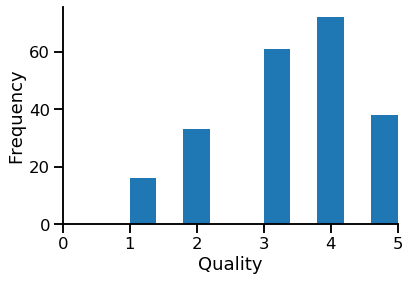

In [112]:
# distribution of quality values for this image category
plt.hist(d['response'])
plt.xlabel('Quality')
plt.xlim((0, 5))
plt.ylabel('Frequency')
sns.despine()

In [128]:
#### barplot aggregated by k and g
picname = 'Person 6'
d2 = df[df['observer'] == picname]

#g.savefig('%s.pdf' % picname

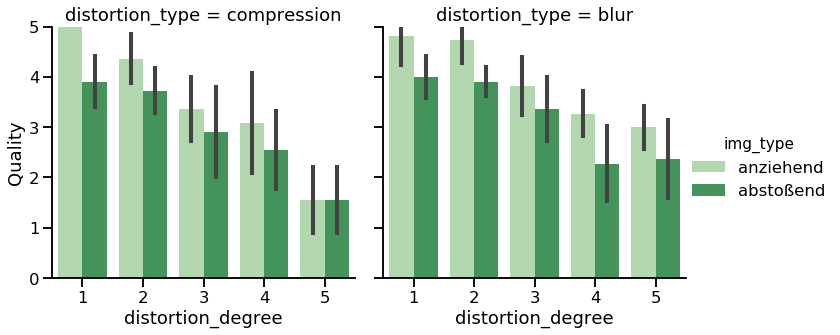

In [132]:
#### barplot aggregated by k and g
imt = sns.catplot(x='distortion_degree', y='response', data=d, hue='img_type', col='distortion_type',
                kind='bar', ci='sd', 
                palette='Greens')
imt.set_ylabels('Quality')
imt.set_xlabels('distortion_degree')
imt.set(ylim = (0, 5))
#imt.savefig('allpictures_aggregated.pdf')

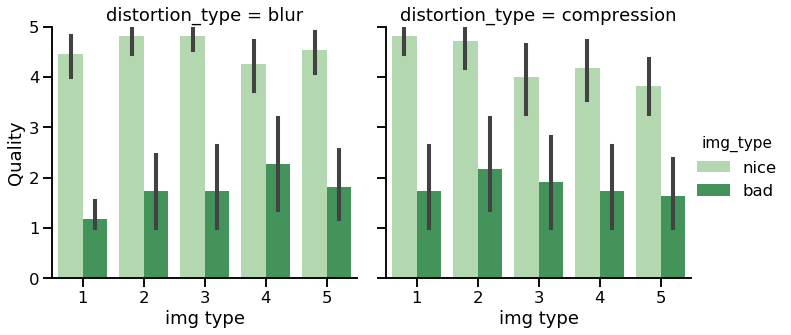

In [18]:
#### barplot aggregated by k and g
g = sns.catplot(x='distortion_degree', y='response', data=d2, hue='img_type',
                col='distortion_type', kind='bar', ci=95,
                palette='Greens')
g.set_ylabels('Quality')
g.set_xlabels('img type')
g.set(ylim = (0, 5))
#g.savefig('%s.pdf' % picname)

## Visualizing data from all pictures

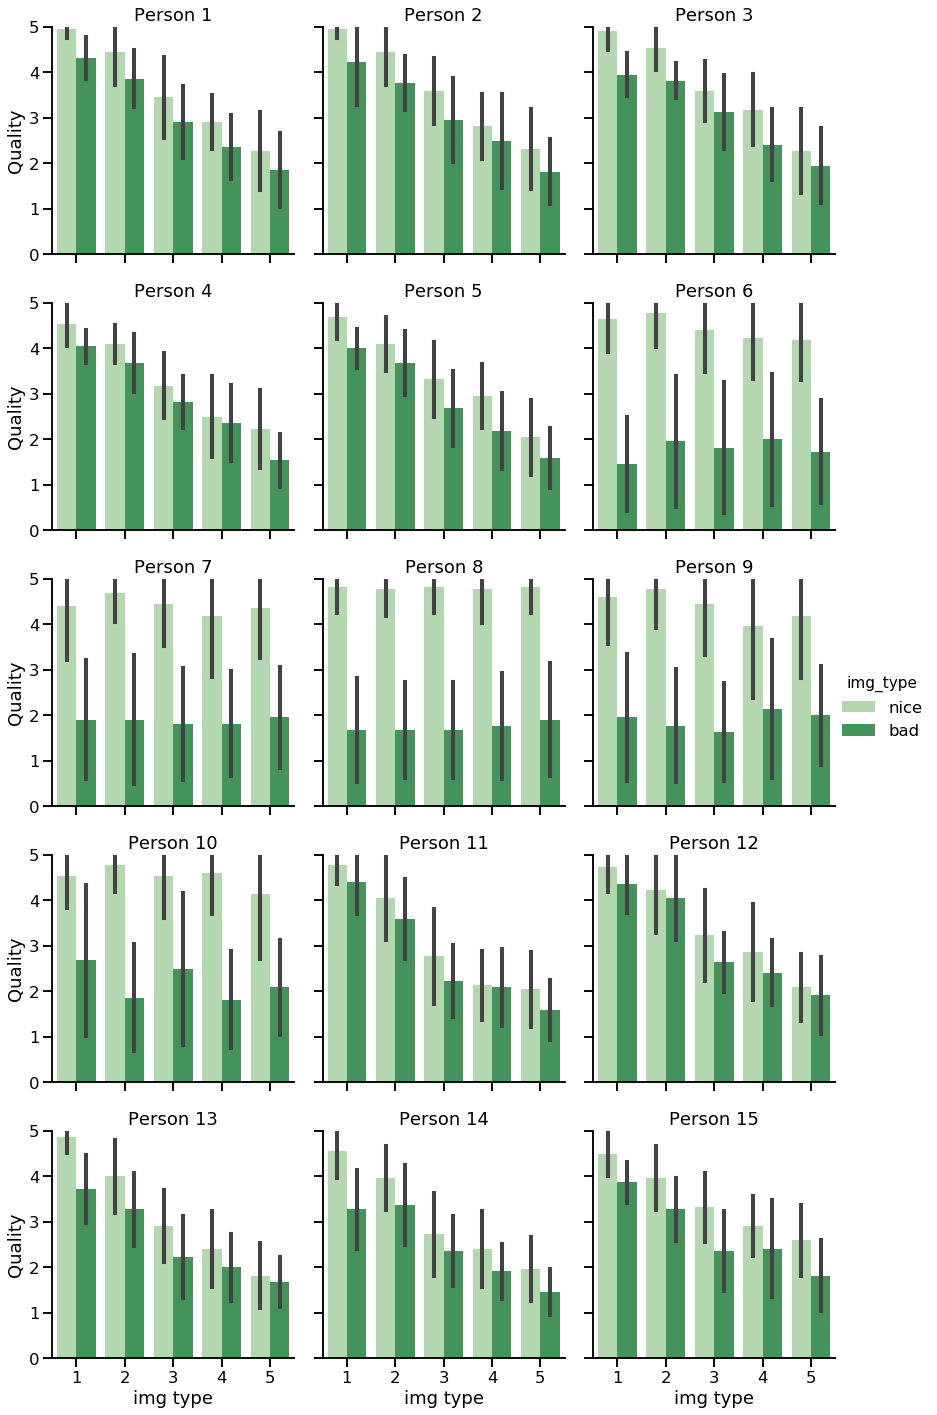

In [21]:
# %%  Using small multiples to visualize data from all pictures in one figure 
g = sns.catplot(x='distortion_degree', y='response', data=df, hue='img_type',
                col='observer', col_wrap = 3, kind='bar', ci='sd', height=4,
                palette='Greens')
g.set_ylabels('Quality')
g.set_xlabels('img type')
g.set_titles('{col_name}')
g.set(ylim = (0, 5))
#g.savefig('allpictures_in_different_panels.pdf')


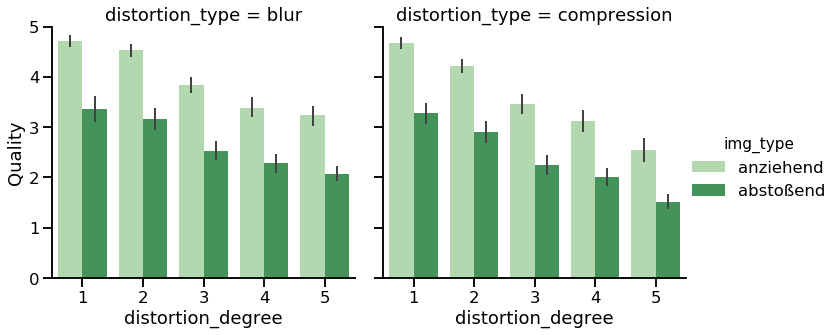

In [129]:
# %% collapsing all pictures into one visualization
#fig, axs = plt.subplots(1,2, figsize=(16,6))
imt = sns.catplot(x='distortion_degree', y='response', data=df, hue='img_type', col='distortion_type',
                kind='bar', ci=95, errwidth=2,
                palette='Greens')
imt.set_ylabels('Quality')
imt.set_xlabels('distortion_degree')
imt.set(ylim = (0, 5))
imt.savefig('allpictures_aggregated.pdf')



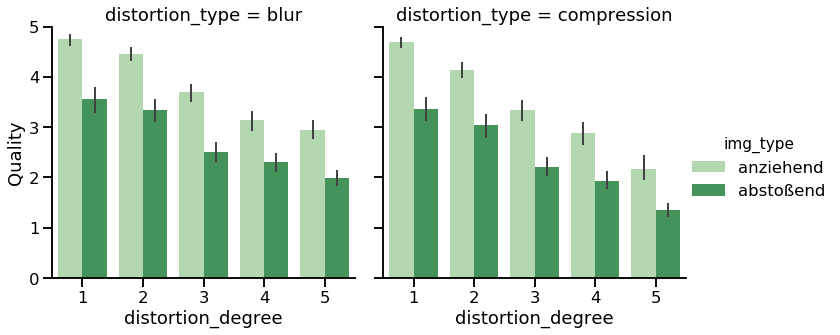

In [133]:
imt = sns.catplot(x='distortion_degree', y='response', data=dfo, hue='img_type', col='distortion_type',
                kind='bar', ci=95, errwidth=2,
                palette='Greens')
imt.set_ylabels('Quality')
imt.set_xlabels('distortion_degree')
imt.set(ylim = (0, 5))
imt.savefig('allpictures_aggregated.pdf')


## Some statistical analysis

In [134]:
# we load scipy
import scipy
dfo

,img_num,img_type,distortion_type,distortion_degree,response,observer
0,11,anziehend,blur,3,4,Person 1
1,5,anziehend,blur,3,4,Person 1
2,9,anziehend,blur,1,5,Person 1
3,3,abstoßend,blur,2,4,Person 1
5,5,abstoßend,compression,4,2,Person 1
...,...,...,...,...,...,...
214,11,anziehend,compression,4,3,Person 15
216,1,abstoßend,blur,4,3,Person 15
217,3,anziehend,blur,3,2,Person 15
218,9,abstoßend,blur,2,2,Person 15


### t-test 
With a t-test we can test whether the values of two groups have the same mean. The null-hypothesis states that the mean difference between the two samples is zero. 
The test gives us a 'p-value', the conditional probability for the observed difference between means under the assumption (condition) that the null-hypothesis is true. When the p-value is smaller than a criterion value (0.05 for 95 % confidence by convention), we say we *reject* the null-hypothesis. In other words, a p value <.05 indicates that the difference between the two samples is unlikely to be truly zero.

In [116]:
# we select the data we want to compare. We select the data for k=0.5 and k=1.5 
# and assign them to two vectors, y1 and y2
k1 = df[df['img_type']=='bad']
k2 = df[df['img_type']=='nice']

k1
#k1['quality_value']


,img_num,img_type,distortion_type,distortion_degree,response,observer
3,3,bad,blur,2,4,Person 1
5,5,bad,compression,4,2,Person 1
9,1,bad,blur,5,3,Person 1
10,10,bad,compression,2,4,Person 1
12,11,bad,compression,4,3,Person 1
...,...,...,...,...,...,...
210,8,bad,blur,5,2,Person 15
212,9,bad,blur,1,3,Person 15
215,10,bad,compression,5,1,Person 15
216,1,bad,blur,4,3,Person 15


In [117]:
# we call a t-test for two independent samples 
tstat, pvalue = scipy.stats.ttest_ind(k1['response'], 
                                      k2['response']) 

print('p-value:', pvalue)

p-value: 3.7215868556386476e-153


The p-value is << 0.05, so we reject the null hypothesis and say that the difference is significant.

### ANOVA
If we want to compare the means of more than 2 groups, we need to perform an Analysis of Variance (ANOVA). The null-hypothesis in the ANOVA states that there is no difference between the means of the groups. A p-value less than 0.05 (at 95 %) rejects this general hypothesis without indicating which groups are different from one another.

In [135]:
# for an ANOVA we need the python module statsmodels (statistical models)
import statsmodels.api as sm  

# the particular function we need is called ols()
# (ols: ordinary least squares, that is the type of fitting)
from statsmodels.formula.api import ols   

In [119]:
# we need to set up a 'formula' for the model. This formula is similar to the syntax in R.

# on the left side of the tilde we put the dependent variable
# on the right side of the tilde we state the independent variables 
# the C( )  indicates that we consider the variable as a categorical variable (and not continuous)
# the sign + is not a sum, it is to indicate more than one variable.
# the sign * is not a multiplication, it is to indicate we want to also model interactions between the variables

# we call ols() passing the model 'formula'
mod = ols('response ~ C(img_type) + C(distortion_type)', data=df)

# we fit the model
fit = mod.fit()

# we show the ANOVA table
sm.stats.anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
C(img_type),1.0,1259.854848,1259.854848,785.538544,3.167185e-155
C(distortion_type),1.0,82.254848,82.254848,51.287142,9.795818e-13
Residual,3297.0,5287.762727,1.603810,NaN,NaN


The ANOVA table shows that for both variables k and g there is a signifficant effect (p-values < 0.05 for 95 % confidence). There is also a signifficant interaction term ('C(k):C(g)').


The p-values reject the null hypothesis, meaning that there is a significant difference between the means. But which ones? To answer that we need to perform a so-called post-hoc test. 

Post-hoc tests do all the pairwise comparisons (like a t-test), but correcting the p-value for multiple comparisons. This correction is needed because of statistical reasons. The risk of not correcting is that we will be detecting differences that are not there. (https://en.wikipedia.org/wiki/Multiple_comparisons_problem).

In [137]:
# perform multiple pairwise comparison
from statsmodels.stats.multicomp import MultiComparison

MultiComp = MultiComparison(df['response'],
                             df['img_type'])

# the first argument is the test we will do, a t-test (same function as above)
# the second argument is the type of correction, in this case Bonferroni correction.
comp = MultiComp.allpairtest(scipy.stats.ttest_ind, method='bonf')
comp[0]


group1,group2,stat,pval,pval_corr,reject
abstoßend,anziehend,-27.8162,0.0,0.0,True


The table shows all comparisons for k. The rightmost column says whether there is a significant difference between the groups tested (reject = True).